In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

plt.style.use('seaborn')


path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)

categorical = ["Well Name", "Formation"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass

target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature != target]

X = data[features]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



train_sizes = list(range(295,2065,295))

def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)
    
def gridsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.GridSearchCV(estimator = estimator, param_grid=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

data.head()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Well Name_CHURCHMAN BIBLE,...,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,Formation_B5 SH,Formation_C LM,Formation_C SH
2429,8,2858.0,90.42,0.860,-1.3,5.750,3.9,2,0.744,0,...,0,0,0,0,0,0,0,0,0,0
2481,6,2884.0,53.14,0.923,1.3,4.350,4.5,2,0.110,0,...,0,0,0,0,0,0,0,0,0,0
716,1,2901.0,59.12,0.599,-1.9,15.465,2.8,1,0.917,0,...,0,0,0,0,0,1,0,0,0,0
1290,2,2795.5,79.17,0.455,2.8,23.200,3.1,1,0.509,0,...,0,0,0,0,0,0,0,0,0,1
567,6,2823.0,85.69,1.133,0.1,3.965,5.0,2,0.186,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
tree_grid = {'max_depth' : range(1,20), 'splitter':["best","random"], 'max_features':["auto","log2",None]}
print(gridsearch_helper(tree_grid, tree.DecisionTreeClassifier(random_state=1), X_train, y_train))

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='random'), 0.7586073500967118, {'max_depth': 17, 'max_features': None, 'splitter': 'random'})


In [53]:
knn_grid = {'n_neighbors' : range(1,10), 'p':[1,2], 'weights':["uniform","distance"]}
print(gridsearch_helper(knn_grid, sklearn.neighbors.KNeighborsClassifier(), X_train, y_train))

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform'), 0.8317214700193424, {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'})


In [54]:
rfc_grid = {'n_estimators' : range(10,30), 'max_features':["auto","log2",None], 'warm_start':[True, False]}
print(gridsearch_helper(rfc_grid, RandomForestClassifier(random_state=1), X_train, y_train))

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=True), 0.8150870406189555, {'max_features': 'auto', 'n_estimators': 25, 'warm_start': True})


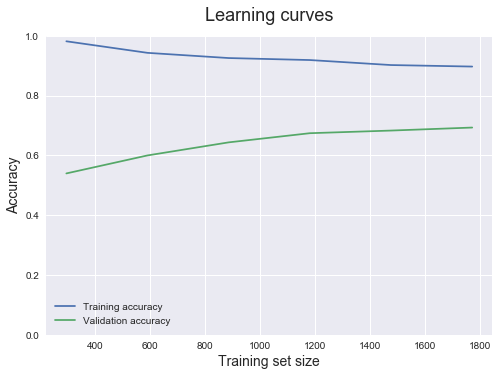

In [21]:
from sklearn.model_selection import learning_curve
from sklearn import tree

dtc_est = tree.DecisionTreeClassifier(max_depth=10)

plot_learning_curve(*tv_scores_mean(dtc_est,X_train,y_train,train_sizes))


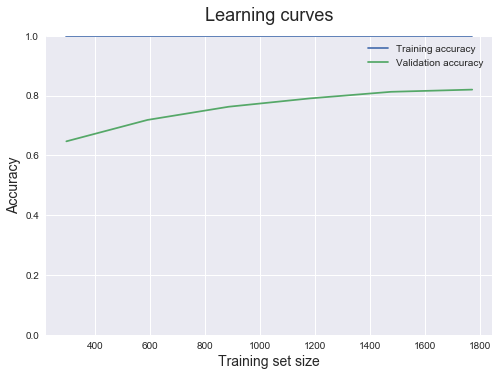

In [42]:
import sklearn

knn_est = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
X = data[features]
y = data[target]


plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))

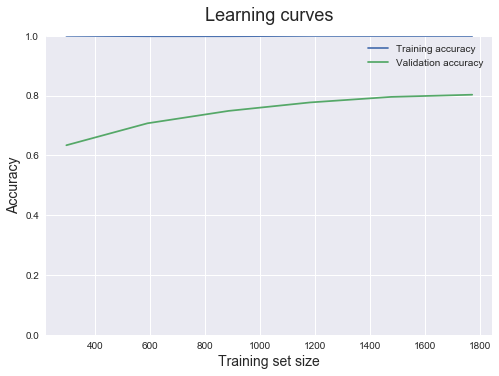

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc_est = RandomForestClassifier(n_estimators = 25, warm_start = True, random_state=1)

plot_learning_curve(*tv_scores_mean(rfc_est,X_train,y_train,train_sizes))

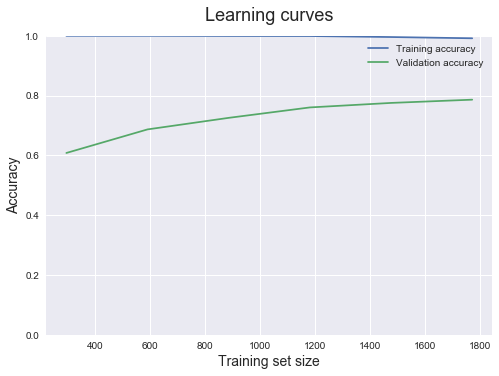

In [27]:
from sklearn.neural_network import MLPClassifier


mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X_train,y_train,train_sizes))

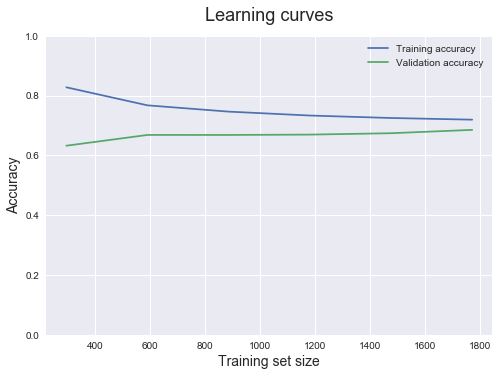

In [28]:
from sklearn import svm

svm_est = svm.SVC(kernel='linear', C=1, gamma=1)

plot_learning_curve(*tv_scores_mean(svm_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


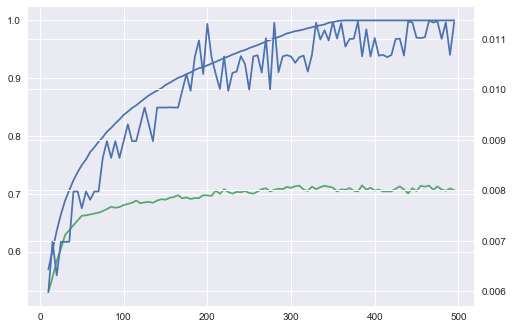

In [24]:
from sklearn import svm, model_selection


param_grid = {'max_leaf_nodes' : range(10,500,5)}

gridsearch = model_selection.GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = param_grid)

gridsearch.fit(X_train,y_train)

def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.plot(hyperparameter_values, train_scores_mean, label = 'Training F1')
    ax1.plot(hyperparameter_values, validation_scores_mean, label = 'Validation F1')
    ax2 = ax1.twinx()
    ax2.plot(hyperparameter_values, time_complexity, label = 'Time Complexity')

plot_complexity_curve(param_grid['max_leaf_nodes'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])